In [1]:
# some setup (probably mostly unneccessary)

import numpy as np
np.random.seed(123)  # for reproducibility
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.models import Sequential
from keras import backend as K
K.set_image_dim_ordering('th')

from keras.datasets import mnist
from keras.models import load_model

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/Users/nzolman/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
# how to save a model
# model.save('keras_mnist_modelv1.h5') 

# load in a model
model_filename = 'keras_mnist_modelv1.h5'
model = load_model(model_filename)

In [3]:
# Print out the layers
for layer in model.layers:
    print(layer.get_config()["name"])


conv2d_3
conv2d_4
max_pooling2d_1
dropout_1
flatten_1
dense_1
dropout_2
dense_2


In [4]:
# We're going to look at the first dense layer 

# get the dense layer
dense_layer= model.layers[-3]

# pull out the weights
dense_weights = np.array(dense_layer.get_weights())

# look at the shape
print("weight shape: ", dense_weights[0].shape)
print("bias shape: ", dense_weights[1].shape)

weight shape:  (4608, 128)
bias shape:  (128,)


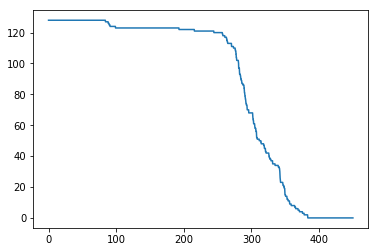

In [5]:
# compute the L1 norm for the dense weights
dense_L1 = np.sum(np.abs(dense_weights[0]), axis = 0)


# function counting the number of nodes above a threshold
def thresh_count(arr, thresh):
    return(np.sum(arr > thresh))

# list of thresholds
thresh_list = np.linspace(0,450, 2000)

# count the number of nodes for all thresholds
dense_count = np.array([thresh_count(dense_L1, thresh) for thresh in thresh_list])

# plot count vs. thresh
plt.plot(thresh_list, dense_count)
plt.show()